Introduction to NetworkX
========================

Last updated: Fri Feb 14 21:16:57 GMT 2014

In this notebook we introduce the NetworkX package for network analysis. To get started using NetworkX, first we have to import the package.

Based on the NetworkX tutorial at [http://networkx.github.io/documentation/latest/tutorial/tutorial.html](http://networkx.github.io/documentation/latest/tutorial/tutorial.html)

Source code: [https://gist.github.com/MHenderson/5902080](https://gist.github.com/MHenderson/5902080)

Notebook viewer: [http://nbviewer.ipython.org/gist/MHenderson/5902080](http://nbviewer.ipython.org/gist/MHenderson/5902080)

In [1]:
pylab.rcParams['figure.figsize'] = 6, 6
import random
random.seed(0)

Creating a Graph
----------------

In [1]:
import networkx as nx
G = nx.Graph()

## Nodes

In [2]:
G.add_node(1)
G.add_nodes_from([2,3])

In [3]:
H = nx.path_graph(10)

In [4]:
G.add_nodes_from(H)

In [5]:
G.add_node(H)

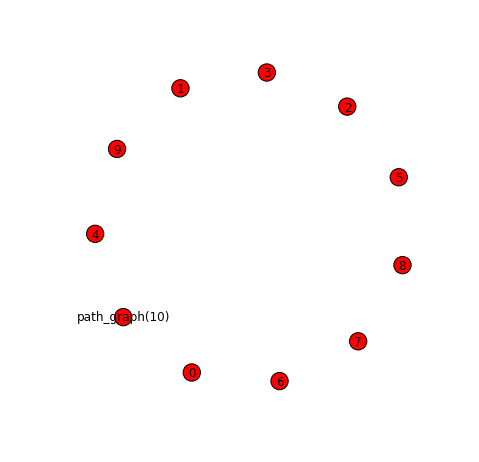

In [7]:
nx.draw(G)

## Edges

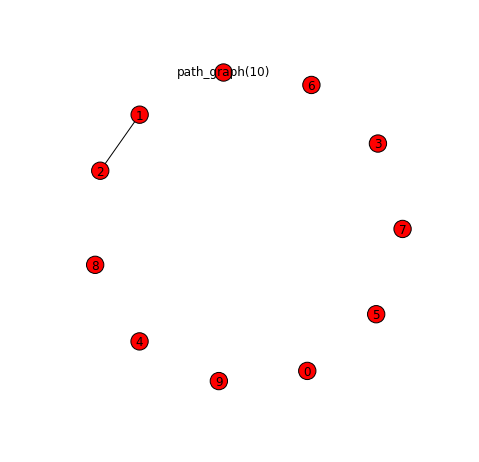

In [8]:
G.add_edge(1,2)
nx.draw(G)

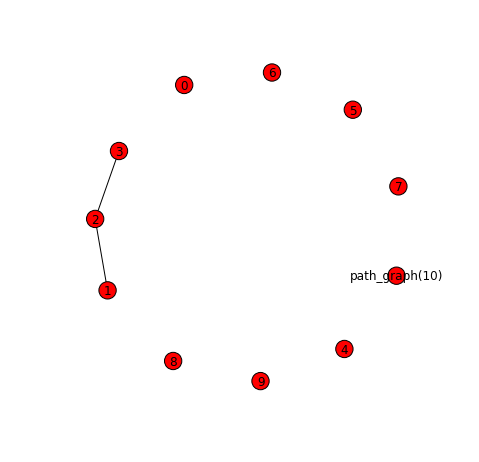

In [9]:
e = (2,3)
G.add_edge(*e)
nx.draw(G)

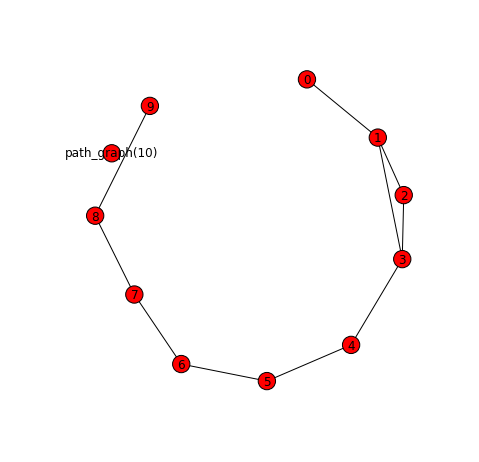

In [10]:
G.add_edges_from([(1,2),(1,3)])
G.add_edges_from(H.edges())
nx.draw(G)

In [11]:
G.remove_node(H)

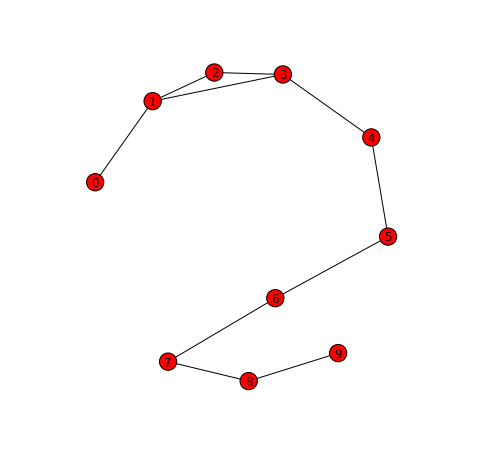

In [12]:
nx.draw(G)

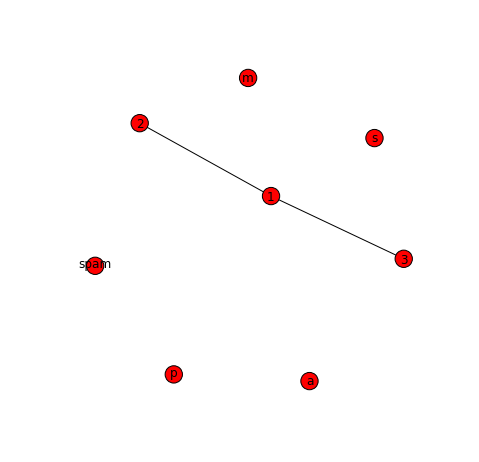

In [13]:
G.clear()

G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")       # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

nx.draw(G)

In [14]:
G.number_of_nodes()

8

In [15]:
G.number_of_edges()

2

In [16]:
G.nodes()

['a', 1, 2, 3, 'spam', 'm', 'p', 's']

In [17]:
G.edges()

[(1, 2), (1, 3)]

In [18]:
G.neighbors(1)

[2, 3]

In [19]:
G.remove_nodes_from("spam")
G.nodes()

[1, 2, 3, 'spam']

In [20]:
G.remove_edge(1,3)

In [21]:
H = nx.DiGraph(G)
H.edges = [(1,2),(2,1)]

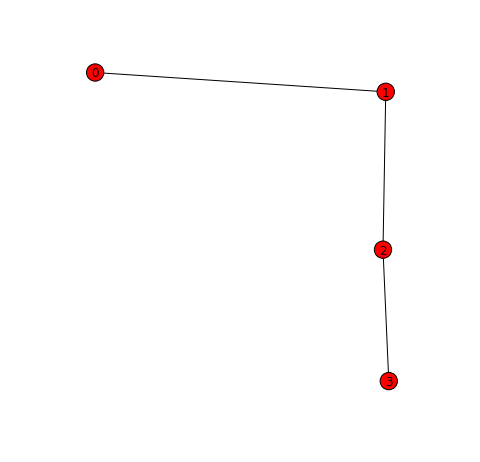

In [22]:
edgelist = [(0,1),(1,2),(2,3)]
H = nx.Graph(edgelist)
nx.draw(H)

## Accessing edges

In [23]:
G[1]

{2: {}}

In [24]:
G[1][2]

{}

In [25]:
G.add_edge(1,3)

In [26]:
G[1][3]['color'] = 'blue'

In [27]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])
for n,nbrs in FG.adjacency_iter():
   for nbr,eattr in nbrs.items():
       data=eattr['weight']
       if data<0.5: print('(%d, %d, %.3f)' % (n,nbr,data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


## Adding attributes to graphs, nodes, and edges

### Graph attributes

In [28]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

### Node attributes

In [29]:
G.graph['day'] = 'Monday'
G.graph

{'day': 'Monday'}

In [30]:
G.add_node(1, time = '5pm')
G.add_nodes_from([3], time = '2pm')
G.node[1]

{'time': '5pm'}

In [31]:
G.node[1]['room'] = 714
G.nodes(data = True)

[(1, {'room': 714, 'time': '5pm'}), (3, {'time': '2pm'})]

### Edge attributes

In [32]:
G.add_edge(1, 2, weight = 4.7 )
G.add_edges_from([(3,4),(4,5)], color = 'red')
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])
G[1][2]['weight'] = 4.7
G.edge[1][2]['weight'] = 4

## Directed Graphs

In [33]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])

In [34]:
DG.out_degree(1,weight = 'weight')

0.5

In [35]:
DG.degree(1,weight = 'weight')

1.25

In [36]:
DG.successors(1)

[2]

In [37]:
DG.neighbors(1)

[2]

In [38]:
DG

In [39]:
DG = nx.Graph(DG)

In [40]:
DG

## Multigraphs

In [41]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1,2,.5), (1,2,.75), (2,3,.5)])

In [42]:
MG.degree(weight = 'weight')

{1: 1.25, 2: 1.75, 3: 0.5}

In [43]:
GG = nx.Graph()
for n,nbrs in MG.adjacency_iter():
    for nbr,edict in nbrs.items():
        minvalue=min([d['weight'] for d in edict.values()])
        GG.add_edge(n,nbr, weight = minvalue)

nx.shortest_path(GG,1,3)

[1, 2, 3]

## Graph generators and graph operations

### Subgraphs

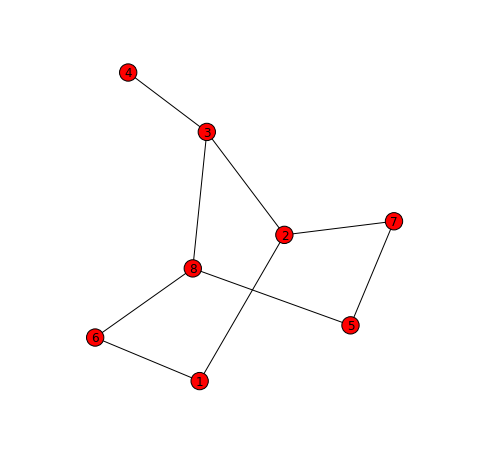

In [44]:
G = nx.petersen_graph()
H = nx.subgraph(G, [1,2,3,4,5,6,7,8])
nx.draw(H)

### Union

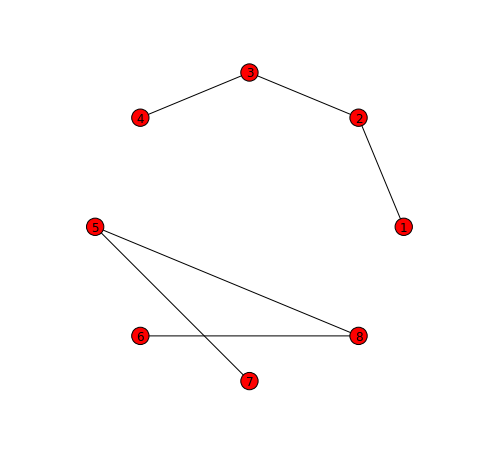

In [45]:
H1 = nx.subgraph(G, [1,2,3,4])
H2 = nx.subgraph(G, [5,6,7,8])
HH = nx.union(H1, H2)
nx.draw_circular(HH)

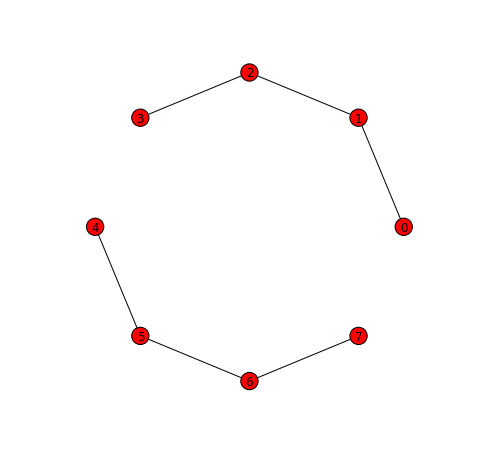

In [46]:
H4 = nx.disjoint_union(H1, H1)
nx.draw_circular(H4)

### Product

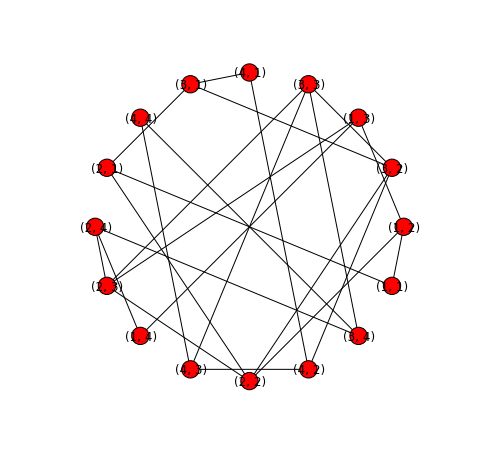

In [47]:
H5 = nx.cartesian_product(H1, H1)
nx.draw_circular(H5)

### Composition

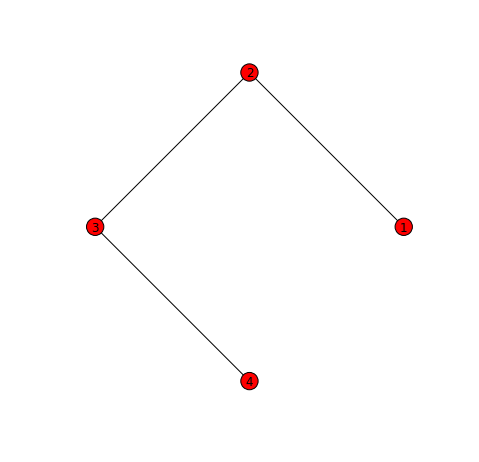

In [48]:
H1 = nx.subgraph(G, [1,2,3,4])
nx.draw_circular(H1)

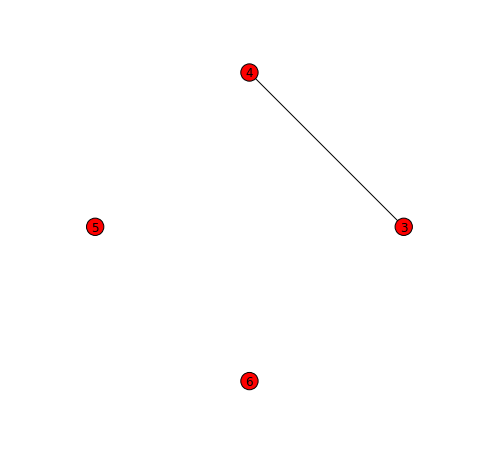

In [49]:
H2 = nx.subgraph(G, [3,4,5,6])
nx.draw_circular(H2)

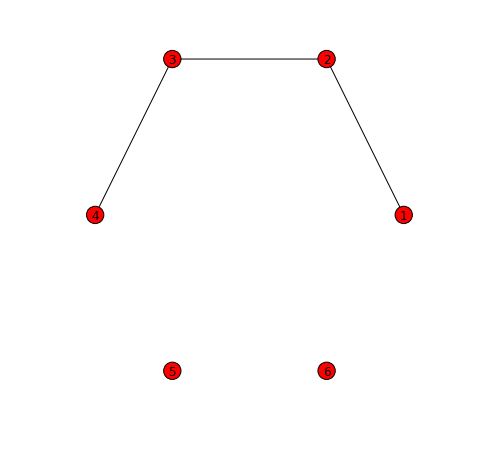

In [50]:
HH = nx.compose(H1, H2)
nx.draw_circular(HH)

### Complement

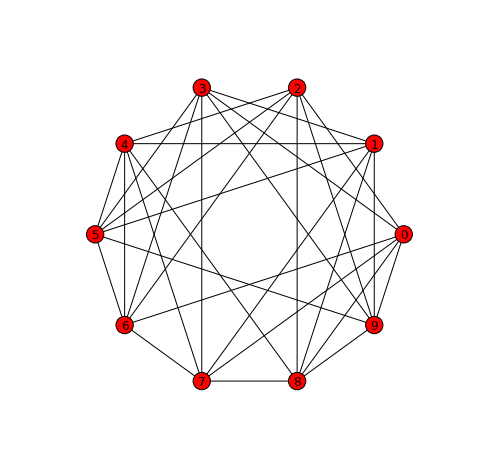

In [51]:
GP = nx.nx.complement(G)
nx.draw_circular(GP)

### Classic small graphs

In [52]:
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

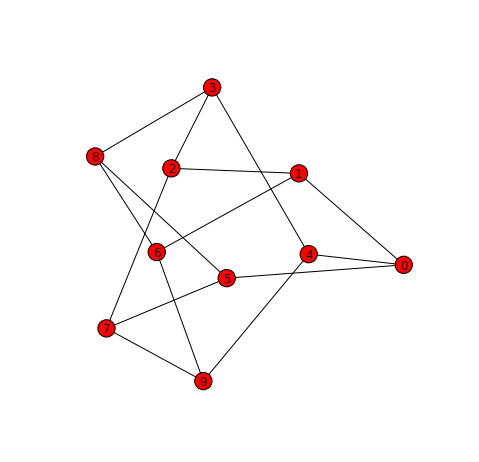

In [53]:
nx.draw(petersen)

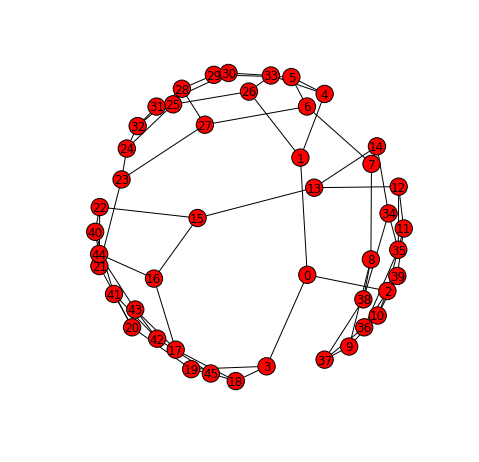

In [54]:
nx.draw(tutte)

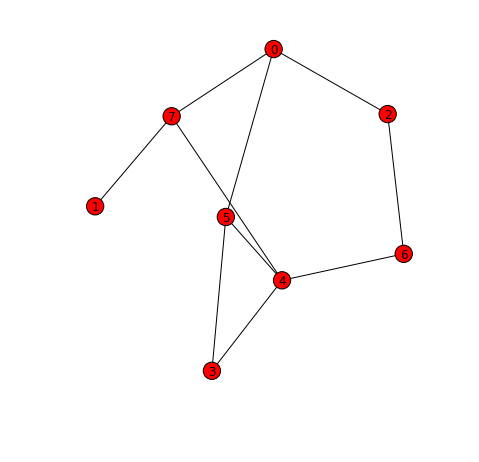

In [55]:
nx.draw(maze)

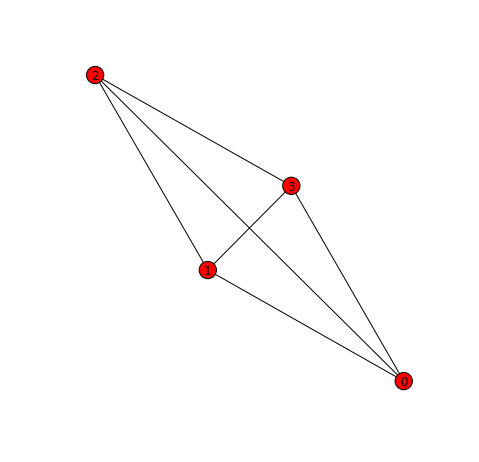

In [56]:
nx.draw(tet)

### Constructive generator for classic graphs

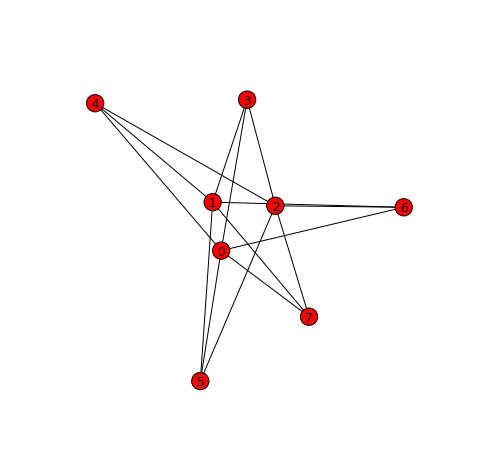

In [57]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3,5)
nx.draw(K_3_5)

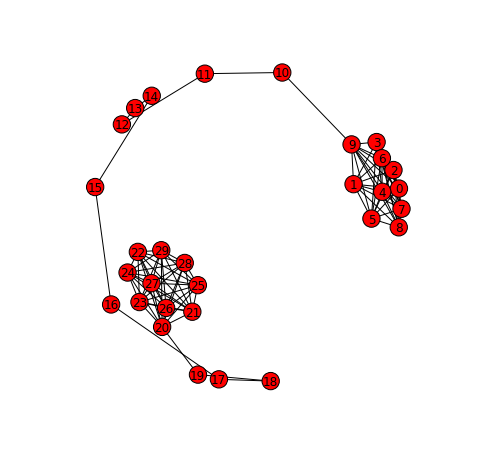

In [58]:
barbell = nx.barbell_graph(10,10)
nx.draw(barbell)

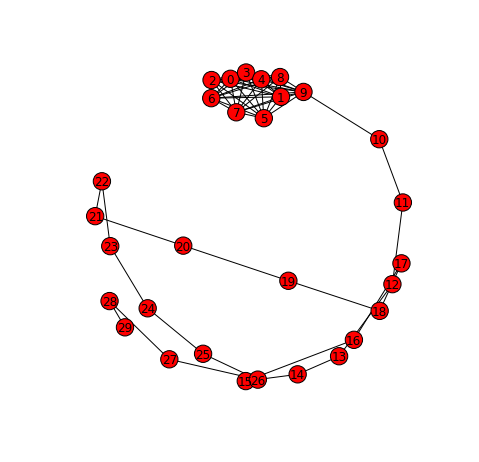

In [59]:
lollipop = nx.lollipop_graph(10,20)
nx.draw(lollipop)

### Stochastic graph generators

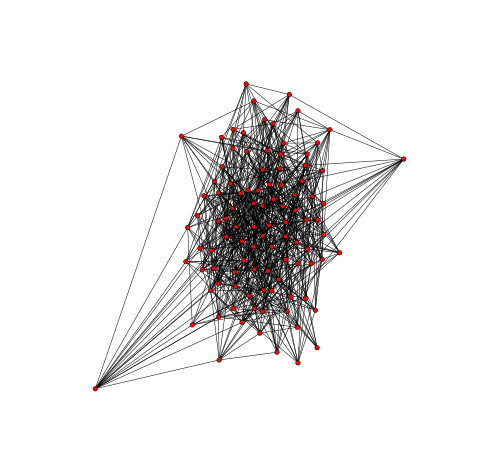

In [96]:
er = nx.erdos_renyi_graph(100,0.15)
nx.draw(er, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows = False)

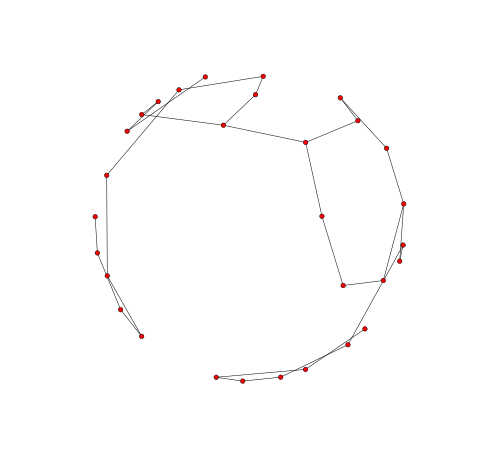

In [97]:
ws = nx.watts_strogatz_graph(30,3,0.1)
nx.draw(ws, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows = False)

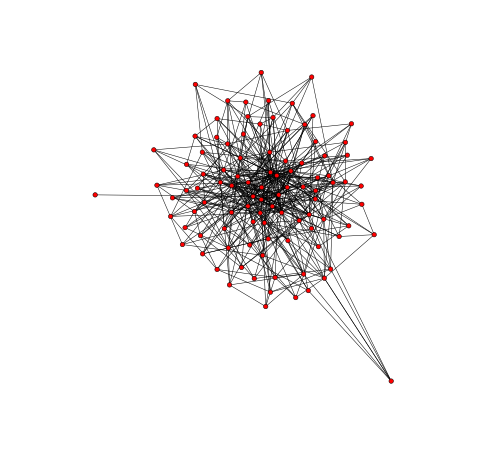

In [98]:
ba = nx.barabasi_albert_graph(100,5)
nx.draw(ba, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows = False)

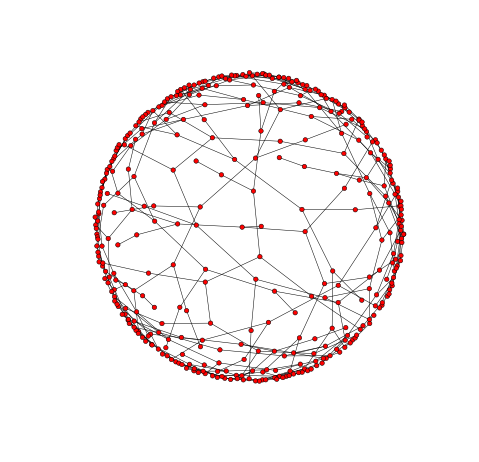

In [99]:
red = nx.random_lobster(100,0.9,0.9)
nx.draw(red, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows = False)

### Reading and writing graphs

In [64]:
nx.write_gml(red,"/home/matthew/tmp/red.gml")
mygraph = nx.read_gml("/home/matthew/tmp/red.gml")

In [65]:
nx.write_gml(er, "/home/matthew/tmp/er.gml")

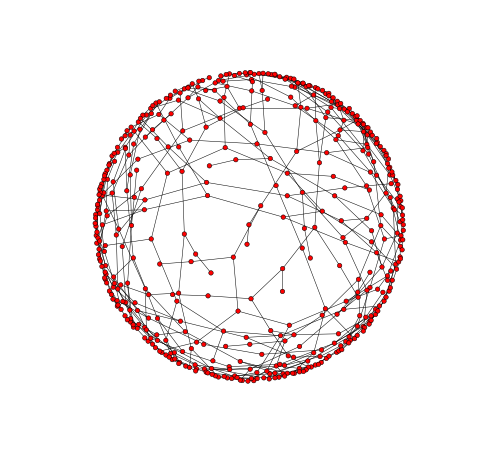

In [100]:
nx.draw(mygraph, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows = False)

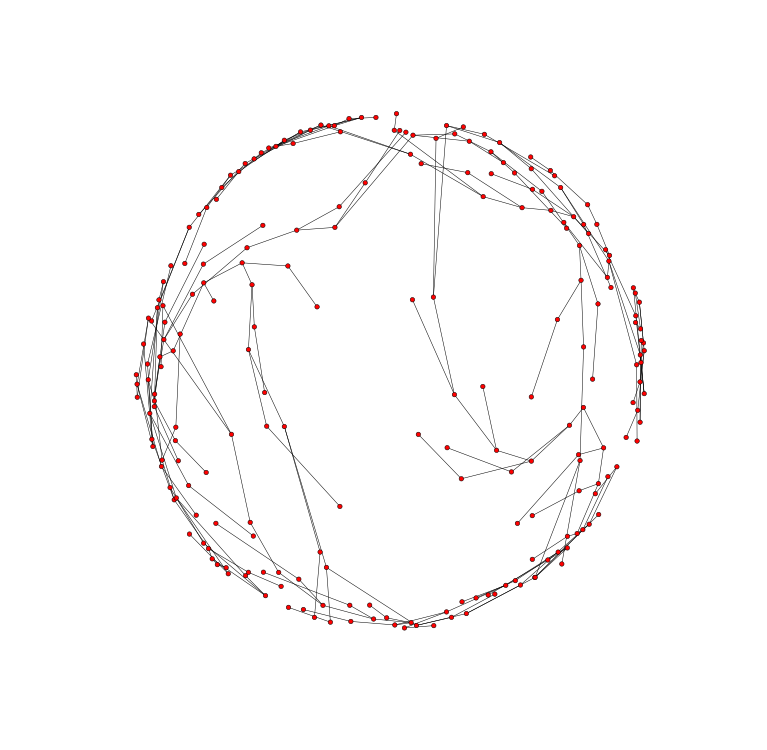

In [67]:
pylab.rcParams['figure.figsize'] = 10, 10

gephi_graph = nx.read_graphml("/home/matthew/tmp/red.graphml")

nx.draw(gephi_graph, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows = False)

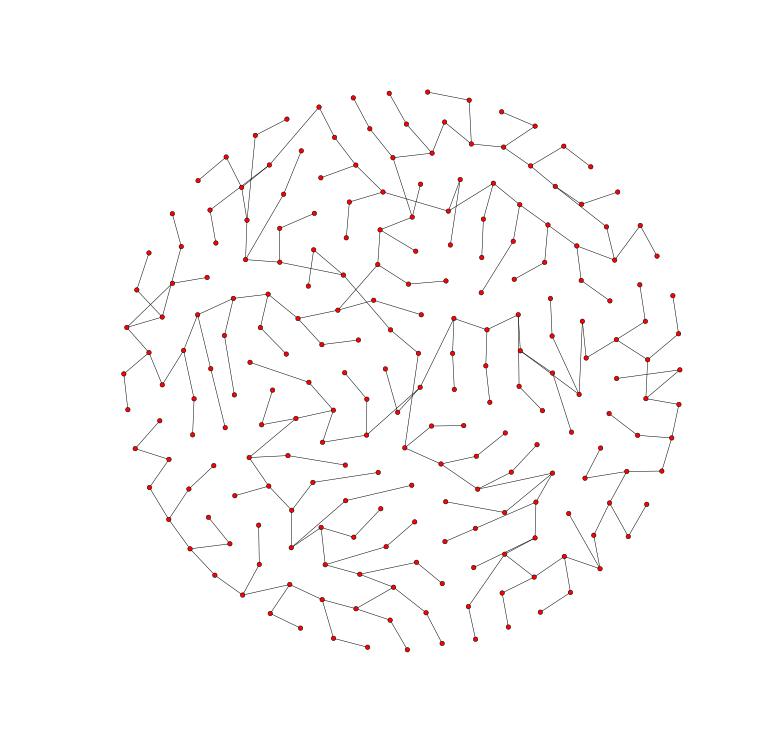

In [68]:
pos = dict([(v,(gephi_graph.node[v]['x'], gephi_graph.node[v]['y'])) for v in gephi_graph.nodes()])
nx.draw(gephi_graph, pos = pos, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows = False)

Basic Graph Analysis
--------------------

In [69]:
G = nx.erdos_renyi_graph(20, 0.2)
print G.name + '\n' + len(G.name)*'-' + '\n'
print "Number of nodes:\t%i.\nNumber of edges:\t%i." % (G.order(), G.size())

gnp_random_graph(20,0.2)
------------------------

Number of nodes:	20.
Number of edges:	37.


In [70]:
G.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [71]:
v = G.nodes()[0]
v

0

In [72]:
G.degree(v)

3

In [73]:
G.neighbors(v)

[16, 9, 11]

In [74]:
G.edges()

[(0, 16),
 (0, 9),
 (0, 11),
 (1, 8),
 (1, 9),
 (1, 6),
 (1, 7),
 (2, 17),
 (3, 9),
 (3, 12),
 (3, 5),
 (4, 17),
 (4, 7),
 (5, 11),
 (5, 18),
 (5, 14),
 (6, 7),
 (6, 9),
 (6, 15),
 (6, 16),
 (6, 19),
 (7, 14),
 (7, 15),
 (7, 17),
 (8, 12),
 (9, 12),
 (9, 16),
 (9, 17),
 (10, 16),
 (10, 11),
 (10, 12),
 (10, 15),
 (11, 17),
 (11, 19),
 (12, 19),
 (13, 17),
 (16, 17)]

In [75]:
e = G.edges()[5]
e

(1, 6)

In [76]:
nx.connected_components(G)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

In [77]:
sorted(nx.degree(G).values())

[1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7]

In [78]:
nx.clustering(G)

{0: 0.3333333333333333,
 1: 0.3333333333333333,
 2: 0.0,
 3: 0.3333333333333333,
 4: 1.0,
 5: 0.0,
 6: 0.26666666666666666,
 7: 0.2,
 8: 0.0,
 9: 0.23809523809523808,
 10: 0.0,
 11: 0.0,
 12: 0.1,
 13: 0.0,
 14: 0.0,
 15: 0.3333333333333333,
 16: 0.3,
 17: 0.09523809523809523,
 18: 0.0,
 19: 0.0}

In [79]:
nx.degree(G,4)

2

In [80]:
G.degree(4)

2

In [81]:
G.degree([2,3,4])

{2: 1, 3: 3, 4: 2}

In [82]:
sorted(G.degree([2,3,4]).values())

[1, 2, 3]

In [83]:
sorted(G.degree().values())

[1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7]

### Drawing graphs

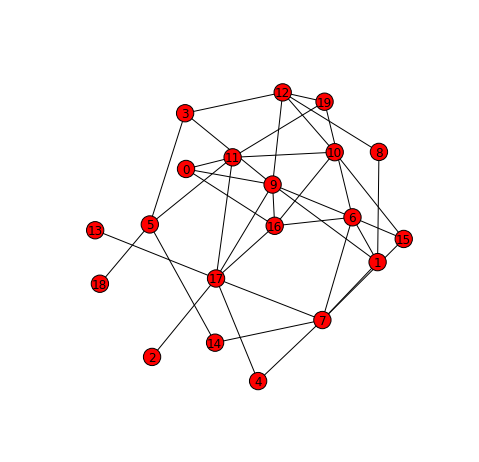

In [84]:
pylab.rcParams['figure.figsize'] = 6, 6

nx.draw(G)

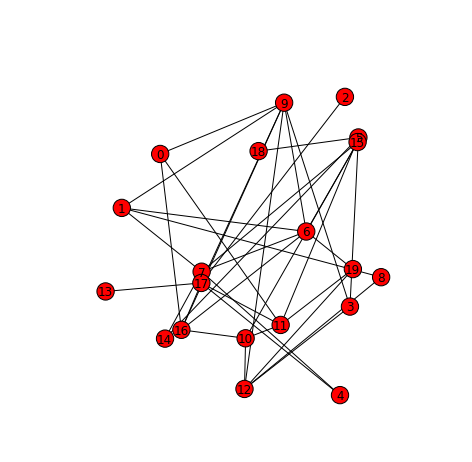

In [85]:
nx.draw_random(G)

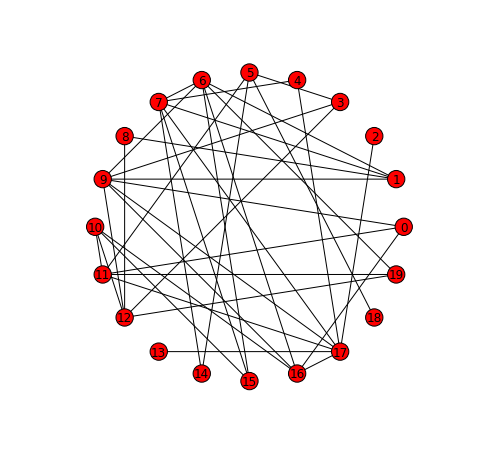

In [86]:
nx.draw_circular(G)

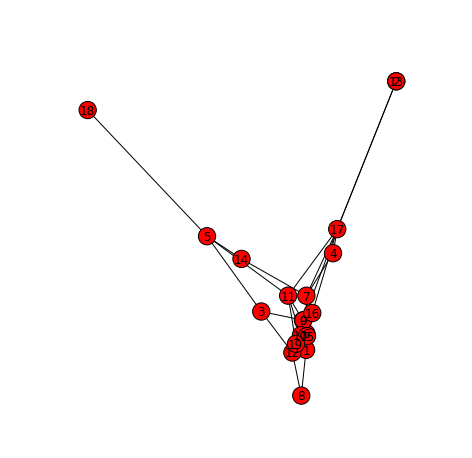

In [87]:
nx.draw_spectral(G)

Iteration
---------

NetworkX has several different iterators to make it convenient to tranverse the nodes and edges of graphs. The most basic are the ```nodes_iter``` and ```edges_iter``` which, respectively, iterate through the nodes and edges of a graph.

If, for example, we want to iterate through the vertices of the Petersen graph and calculate the degree of each vertex in turn then we can do the following:

In [88]:
for node in G.nodes_iter():
    print "The degree of node %s is %i." % (node, G.degree(node))

The degree of node 0 is 3.
The degree of node 1 is 4.
The degree of node 2 is 1.
The degree of node 3 is 3.
The degree of node 4 is 2.
The degree of node 5 is 4.
The degree of node 6 is 6.
The degree of node 7 is 6.
The degree of node 8 is 2.
The degree of node 9 is 7.
The degree of node 10 is 4.
The degree of node 11 is 5.
The degree of node 12 is 5.
The degree of node 13 is 1.
The degree of node 14 is 2.
The degree of node 15 is 3.
The degree of node 16 is 5.
The degree of node 17 is 7.
The degree of node 18 is 1.
The degree of node 19 is 3.


In fact, as this is such a common routine, NetworkX provides a special ```degree_iter``` iterator for just this function.

In [89]:
for node, degree in G.degree_iter():
    print "The degree of node %i is %i." % (node, degree)

The degree of node 0 is 3.
The degree of node 1 is 4.
The degree of node 2 is 1.
The degree of node 3 is 3.
The degree of node 4 is 2.
The degree of node 5 is 4.
The degree of node 6 is 6.
The degree of node 7 is 6.
The degree of node 8 is 2.
The degree of node 9 is 7.
The degree of node 10 is 4.
The degree of node 11 is 5.
The degree of node 12 is 5.
The degree of node 13 is 1.
The degree of node 14 is 2.
The degree of node 15 is 3.
The degree of node 16 is 5.
The degree of node 17 is 7.
The degree of node 18 is 1.
The degree of node 19 is 3.


By using the ```neighbors``` graph method we can iterate over the nodes in a graph finding the neighbors of every node.

In [90]:
for node in G.nodes_iter():
    print "The neighbors of node %i in G are %s." % (node, G.neighbors(node))

The neighbors of node 0 in G are [16, 9, 11].
The neighbors of node 1 in G are [8, 9, 6, 7].
The neighbors of node 2 in G are [17].
The neighbors of node 3 in G are [9, 12, 5].
The neighbors of node 4 in G are [17, 7].
The neighbors of node 5 in G are [11, 18, 3, 14].
The neighbors of node 6 in G are [1, 7, 9, 15, 16, 19].
The neighbors of node 7 in G are [1, 4, 6, 14, 15, 17].
The neighbors of node 8 in G are [1, 12].
The neighbors of node 9 in G are [0, 1, 3, 6, 12, 16, 17].
The neighbors of node 10 in G are [16, 11, 12, 15].
The neighbors of node 11 in G are [0, 17, 10, 19, 5].
The neighbors of node 12 in G are [8, 9, 10, 3, 19].
The neighbors of node 13 in G are [17].
The neighbors of node 14 in G are [5, 7].
The neighbors of node 15 in G are [10, 6, 7].
The neighbors of node 16 in G are [0, 9, 10, 6, 17].
The neighbors of node 17 in G are [2, 4, 7, 9, 11, 13, 16].
The neighbors of node 18 in G are [5].
The neighbors of node 19 in G are [11, 12, 6].


In many graph algorithms we need to examine the neighbours of a vertex to test a condition. For example, to find the neighbouring vertex of highest degree. The ```neighbors_iter``` is a convenient method for doing this in NetworkX.

In [91]:
for i in G.neighbors_iter(v):
    print i

16
9
11


Combining the ```nodes_iter``` and ```neighbours_iter``` makes it very easy to visit the neighbours of every node in a graph.

In [92]:
for node in G.nodes_iter():
    for neighbor in G.neighbors_iter(node):
        print "Node %i is a neighbor of node %i." % (node, neighbor)

Node 0 is a neighbor of node 16.
Node 0 is a neighbor of node 9.
Node 0 is a neighbor of node 11.
Node 1 is a neighbor of node 8.
Node 1 is a neighbor of node 9.
Node 1 is a neighbor of node 6.
Node 1 is a neighbor of node 7.
Node 2 is a neighbor of node 17.
Node 3 is a neighbor of node 9.
Node 3 is a neighbor of node 12.
Node 3 is a neighbor of node 5.
Node 4 is a neighbor of node 17.
Node 4 is a neighbor of node 7.
Node 5 is a neighbor of node 11.
Node 5 is a neighbor of node 18.
Node 5 is a neighbor of node 3.
Node 5 is a neighbor of node 14.
Node 6 is a neighbor of node 1.
Node 6 is a neighbor of node 7.
Node 6 is a neighbor of node 9.
Node 6 is a neighbor of node 15.
Node 6 is a neighbor of node 16.
Node 6 is a neighbor of node 19.
Node 7 is a neighbor of node 1.
Node 7 is a neighbor of node 4.
Node 7 is a neighbor of node 6.
Node 7 is a neighbor of node 14.
Node 7 is a neighbor of node 15.
Node 7 is a neighbor of node 17.
Node 8 is a neighbor of node 1.
Node 8 is a neighbor of no

In [93]:
for i in G.edges_iter():
    print i


(0, 16)
(0, 9)
(0, 11)
(1, 8)
(1, 9)
(1, 6)
(1, 7)
(2, 17)
(3, 9)
(3, 12)
(3, 5)
(4, 17)
(4, 7)
(5, 11)
(5, 18)
(5, 14)
(6, 7)
(6, 9)
(6, 15)
(6, 16)
(6, 19)
(7, 14)
(7, 15)
(7, 17)
(8, 12)
(9, 12)
(9, 16)
(9, 17)
(10, 16)
(10, 11)
(10, 12)
(10, 15)
(11, 17)
(11, 19)
(12, 19)
(13, 17)
(16, 17)


Algorithms
----------

### Boundary

In [94]:
nx.node_boundary(G, [1,2,3])

[5, 6, 7, 8, 9, 12, 17]

In [95]:
nx.edge_boundary(G, [1,2,3])

[(1, 8), (1, 9), (1, 6), (1, 7), (2, 17), (3, 9), (3, 12), (3, 5)]